# Decision Trees for Classification Explained 

#### Build Decision Tree in classification and regression algorithm to build a model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

#### Getting the histocial data from yahoo finance

In [2]:
# input
symbol = 'AMD'
start = '2012-01-01'
end = '2021-09-05'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,5.53,5.59,5.44,5.48,5.48,12675100
2012-01-04,5.47,5.49,5.41,5.46,5.46,8034900
2012-01-05,5.45,5.57,5.35,5.46,5.46,11476900
2012-01-06,5.44,5.52,5.39,5.43,5.43,12938600
2012-01-09,5.42,5.60,5.38,5.59,5.59,12585400


#### Create more data

In [3]:
# Create more data
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,-1)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,-1)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,-1)
dataset['Return'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset['Up_Down'] = np.where(dataset['Return'].shift(-1) > dataset['Return'],'Up','Down')
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Return,Up_Down
Date,,,,,,,,,,,
2012-01-04,5.47,5.49,5.41,5.46,5.46,8034900,1,-1,-1,-0.003650,Up
2012-01-05,5.45,5.57,5.35,5.46,5.46,11476900,1,-1,-1,0.000000,Down
2012-01-06,5.44,5.52,5.39,5.43,5.43,12938600,-1,-1,1,-0.005495,Up
2012-01-09,5.42,5.60,5.38,5.59,5.59,12585400,-1,1,1,0.029466,Down
2012-01-10,5.66,5.75,5.64,5.71,5.71,10129600,1,1,1,0.021467,Down


In [4]:
dataset.shape

(2434, 11)

In [5]:
predictors_list = ['Open', 'High','Low', 'Adj Close', 'Return', 'Volume']
X = dataset[predictors_list]
X.tail()

,Open,High,Low,Adj Close,Return,Volume
Date,,,,,,
2021-08-30,112.610001,114.489998,111.260002,111.320000,-0.000718,56130500
2021-08-31,111.260002,111.260002,109.029999,110.720001,-0.005390,49339000
2021-09-01,111.300003,111.849998,109.849998,109.989998,-0.006593,38579600
2021-09-02,110.320000,110.879997,108.769997,109.199997,-0.007182,40090500
2021-09-03,108.849998,111.169998,108.500000,109.919998,0.006593,42605800


In [6]:
y = dataset['Buy_Sell']

In [30]:
y.name

'Buy_Sell'

In [7]:
X.columns

Index(['Open', 'High', 'Low', 'Adj Close', 'Return', 'Volume'], dtype='object')

#### test_size
the size of the test data set, in this case, 30% of the data for the tests and, therefore, 70% for the training.
#### random_state
Since the sampling is random, this parameter allows us to reproduce the same randomness in each execution.
#### stratify
To ensure that the training and test sample data are proportional, we set the parameter to yes. This means that, for example, if there are more days with positive than negative return, the training and test samples will keep the same proportion. 

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200, stratify=y)

In [9]:
train_length = int(len(dataset)*0.80)
X_train = X[:train_length]
X_test = X[train_length:]
y_train = y[:train_length]
y_test = y[train_length:]

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1947, 6) (1947,)
(487, 6) (487,)


In [10]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
from mlxtend.evaluate import bias_variance_decomp

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(clf, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', random_seed=123)

print('MSE: %.3f' % avg_expected_loss)
print('Bias: %.3f' % avg_bias)
print('Variance: %.3f' % avg_var)

MSE: 1.995
Bias: 1.100
Variance: 0.896


In [12]:
# Prediction
prediction = clf.predict(X_test)

In [13]:
# Evaluation
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, prediction))

DecisionTrees's Accuracy:  0.4989733059548255


In [14]:
# Accuracy Score without Sklearn
boolian = (y_test==prediction)
accuracy = sum(boolian)/y_test.size
accuracy

0.4989733059548255

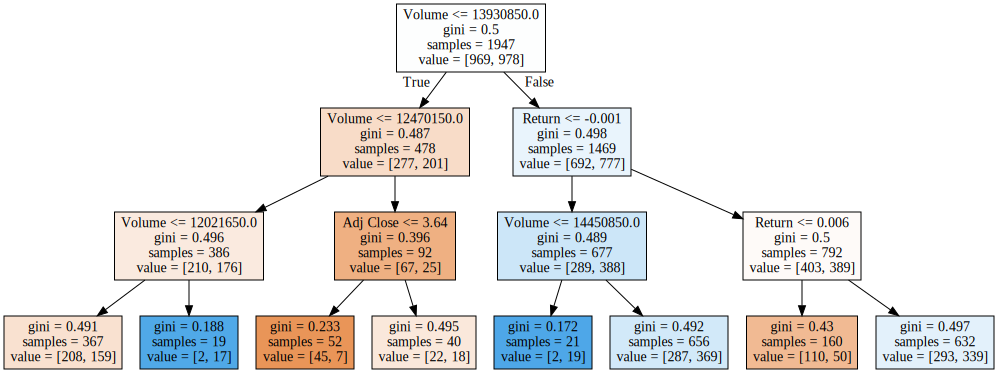

In [15]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names=X.columns)
dot_data = tree.export_graphviz(clf, out_file=None,filled=True,feature_names=predictors_list)
graphviz.Source(dot_data)

In [16]:
def plot_curve(ticks, train_scores, test_scores):
    train_scores_mean = -1 * np.mean(train_scores, axis=1)
    train_scores_std = -1 * np.std(train_scores, axis=1)
    test_scores_mean = -1 * np.mean(test_scores, axis=1)
    test_scores_std = -1 * np.std(test_scores, axis=1)

    plt.figure()
    plt.fill_between(ticks, 
                     train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(ticks, 
                     test_scores_mean - test_scores_std, 
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(ticks, train_scores_mean, 'b-', label='Training score')
    plt.plot(ticks, test_scores_mean, 'r-', label='Test score')
    plt.legend(fancybox=True, facecolor='w')

    return plt.gca()


In [17]:
def plot_validation_curve(clf, X, y, param_name, param_range, scoring='roc_auc'):
    plt.xkcd()
    ax = plot_curve(param_range, *validation_curve(clf, X, y, cv=num_folds, 
                                                   scoring=scoring, 
                                                   param_name=param_name, 
                                                   param_range=param_range, n_jobs=-1))
    ax.set_title('')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlim(2,12)
    ax.set_ylim(-0.97, -0.83)
    ax.set_ylabel('Error')
    ax.set_xlabel('Model complexity')
    ax.text(9, -0.94, 'Overfitting', fontsize=22)
    ax.text(3, -0.94, 'Underfitting', fontsize=22)
    ax.axvline(7, ls='--')
    plt.tight_layout()
    


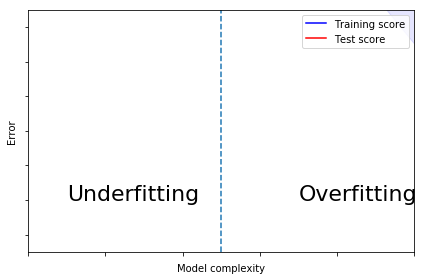

In [18]:
from sklearn.model_selection import validation_curve
num_folds = 7
plot_validation_curve(clf, X_train, y_train, param_name='max_depth', param_range=range(10,16))

#### Compare the scores of testing on training and testing data. If the scores are close to equal, is likely underfitting; however, if they are far apart, is likely overfitting. 

In [21]:
from sklearn import cross_validation

for i in range(5):

    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
    clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=3).fit(X_train, y_train)

    print("Test score", clf.score(X_test, y_test))   
    print("Train score", clf.score(X_train, y_train))   

Test score 0.4804928131416838
Train score 0.5608628659476117
Test score 0.5420944558521561
Train score 0.5387776065742167
Test score 0.4804928131416838
Train score 0.5557267591165896
Test score 0.5215605749486653
Train score 0.5536723163841808
Test score 0.5071868583162218
Train score 0.5475089881869543


In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction, target_names=y.name))

             precision    recall  f1-score   support

          B       0.44      0.11      0.17       249
          u       0.48      0.86      0.61       238

avg / total       0.46      0.47      0.39       487



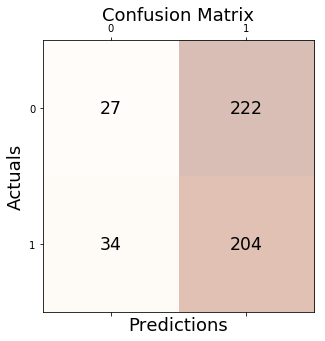

In [38]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=prediction)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


print('Precision: %.3f' % precision_score(y_test, prediction))
print('Recall: %.3f' % recall_score(y_test, prediction))
print('Accuracy: %.3f' % accuracy_score(y_test, prediction))
print('F1 Score: %.3f' % f1_score(y_test, prediction))

Precision: 0.479
Recall: 0.857
Accuracy: 0.474
F1 Score: 0.614
